# STA 141B Assignment 4

Due __March 8, 2024__ by __11:59pm__. Submit your work by uploading it to Gradescope through Canvas.

Instructions:

1. Provide your solutions in new cells following each exercise description. Create as many new cells as necessary. Use code cells for your Python scripts and Markdown cells for explanatory text or answers to non-coding questions. Answer all textual questions in complete sentences.
2. The use of assistive tools is permitted, but must be indicated. You will be graded on you proficiency in coding. Produce high quality code by adhering to proper programming principles. 
3. Export the .jpynb as .pdf and submit it on Gradescope in time. To facilitate grading, indicate the area of the solution on the submission. Submissions without indication will be marked down. No late submissions accepted. 
4. If test cases are given, your solution must be in the same format. 
5. The total number of points is 10. 

__(a, i)__ Write a function that retrieves all links to movies in the database by scraping the _alphabetical_ section on [imsdb.com](https://imsdb.com/) and retrieve the links. _How many links did you find?_ __(ii)__ Write a function `fetch_script` that, given the link of a movie retrieved in (i), returns a dictionary that contains all relevant information of the movie: 

```python
fetch_script('/Movie Scripts/10 Things I Hate About You Script.html')

>>> {'title': '10 Things I Hate About You',
     'writers': ['Karen McCullah Lutz', 'Kirsten Smith', 'William Shakespeare'],
     'genres': ['Comedy', 'Romance'],
     'date': 1997,
     'script': '...'}
```

The `script` field contains a string of the scraped script. Retrieve the information for all movies. _How many scripts did you retrieve?_

In [15]:
import requests
import lxml.html as lx

link_end = ['0'] + [chr(char) for char in range(ord('a'), ord('z') + 1)]
url = 'https://imsdb.com/alphebetical/{}'
script_url = 'https://imsdb.com/Movie%20Scripts'
all_links = []
def alphabetical():
    for character in link_end:
        current_url = url.format(character)
        results = requests.get(current_url, params=None)
        html = lx.fromstring(results.text)
        links = html.xpath('//td[@valign="top"]//a/@href')
        for link in links[60:]:
            movie = script_url + link.replace(' ','%20')
            all_links.append(movie)
    return all_links

links = alphabetical()
for link in links:
    print(link)

In [21]:
import requests
from bs4 import BeautifulSoup

def fetch_script(movie_link):
    response = requests.get(movie_link)
    soup = BeautifulSoup(response.text, 'html.parser')
    script_details = soup.find('table', class_='script-details')

    # Extract the title, writers, genre, date, and script
    movie_info = {}
    movie_info['title'] = soup.find('title').text
    movie_info['writers'] = [writer.text for writer in soup.find_all('a', href=lambda href: href and "writer.php" in href)]
    movie_info['genre'] = [genre.text for genre in script_details.find_all('a', href=lambda href: href and "/genre/" in href)]
    script_date_element = soup.find(lambda tag: tag.name == 'td' and 'Script Date :' in tag.text)
    movie_release_date_element = soup.find(lambda tag: tag.name == 'td' and 'Movie Release Date :' in tag.text)
    movie_info['script_date'] = script_date_element.text.split(': ')[1] if script_date_element else 'N/A'
    movie_info['movie_release_date'] = movie_release_date_element.text.split(': ')[1] if movie_release_date_element else 'N/A'
    script_link = script_details.find('a', href=lambda href: href and "scripts" in href)
    movie_info['script_url'] = script_link['href'] if script_link else 'N/A'

    return movie_info

movie_link = 'https://imsdb.com/Movie%20Scripts/First%20Cow%20Script.html'
movie_info = fetch_script(movie_link)
for key, value in movie_info.items():
    print(f"{key}: {value}")

title: First Cow Script at IMSDb.
writers: ['Jon Raymond', 'Kelly Reichardt']
genre: ['Drama', 'Western']
script_date: N/A
movie_release_date: August 2019

Read "First Cow" Script






User Comments for First Cow





Add your own comment







*Name
script_url: /scripts/First-Cow.html


__(b)__ We are interested in the genres `'Musical'`, `'Horror'`, and `'Romance'`. Craft a barplot displaying the absolute counts for each of these categories. In each bar, color-code the movies that are also counted in the other two genres. 

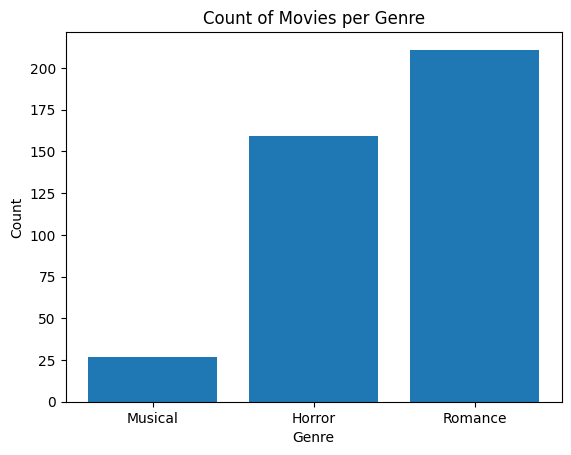

In [25]:
import requests
import lxml.html as lx
import matplotlib.pyplot as plt

url = 'https://imsdb.com/alphabetical/{}'
script_url = 'https://imsdb.com'
genre_counts = {'Musical': 0, 'Horror': 0, 'Romance': 0}

def fetch_genre(movie_link):
    response = requests.get(movie_link)
    html = lx.fromstring(response.content)
    genres = html.xpath('//table[@class="script-details"]//a[contains(@href, "/genre/")]/text()')
    return genres

link_end = ['0'] + [chr(char) for char in range(ord('a'), ord('z') + 1)]

def alphabetical():
    all_links = []
    for character in link_end:
        current_url = url.format(character)
        results = requests.get(current_url)
        html = lx.fromstring(results.content)
        links = html.xpath('//td[@valign="top"]//a/@href')
        for link in links:
            link = link.replace('https://imsdb.com', '').replace('http://imsdb.com', '')
            movie = script_url + link.replace(' ', '%20')
            all_links.append(movie)
    return all_links

links = alphabetical()

for link in links:
    genres = fetch_genre(link)
    for genre in genres:
        if genre in genre_counts:
            genre_counts[genre] += 1

# Plotting the barplot
plt.bar(genre_counts.keys(), genre_counts.values())
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Count of Movies per Genre')
plt.show()


__(c, i)__ Using only regex, write a function `tokenizer` that returns bigrams of all non-whitespace and non-punctuation characters, according to the test case below: 

```python
test = '''
    Neque porro quisquam est, qui dolorem ipsum quia dolor sit amet, 
    consectetur, adipisci velit, sed quia non numquam eius modi tempora 
    incidunt ut labore et dolore magnam aliquam quaerat voluptatem.
'''
tokenizer(test)
>>> ['neque porro',
 'porro quisquam',
 'quisquam est',
 'qui dolorem',
 'dolorem ipsum',
 'ipsum quia',
 'quia dolor',
 'dolor sit',
 'sit amet',
 'adipisci velit',
 'sed quia',
 'quia non',
 'non numquam',
 'numquam eius',
 'eius modi',
 'modi tempora',
 'incidunt ut',
 'ut labore',
 'labore et',
 'et dolore',
 'dolore magnam',
 'magnam aliquam',
 'aliquam quaerat',
 'quaerat voluptatem']
 ```

In [23]:
test = '''
    Neque porro quisquam est, qui dolorem ipsum quia dolor sit amet, 
    consectetur, adipisci velit, sed quia non numquam eius modi tempora 
    incidunt ut labore et dolore magnam aliquam quaerat voluptatem.
'''
import re

def tokenizer(text):
    # Find all words in the text
    words = re.findall(r'\b\w+\b', text)
    # Create bigrams
    bigrams = [' '.join(pair) for pair in zip(words[:-1], words[1:])]
    return bigrams

tokenizer(test)

['Neque porro',
 'porro quisquam',
 'quisquam est',
 'est qui',
 'qui dolorem',
 'dolorem ipsum',
 'ipsum quia',
 'quia dolor',
 'dolor sit',
 'sit amet',
 'amet consectetur',
 'consectetur adipisci',
 'adipisci velit',
 'velit sed',
 'sed quia',
 'quia non',
 'non numquam',
 'numquam eius',
 'eius modi',
 'modi tempora',
 'tempora incidunt',
 'incidunt ut',
 'ut labore',
 'labore et',
 'et dolore',
 'dolore magnam',
 'magnam aliquam',
 'aliquam quaerat',
 'quaerat voluptatem']

__(ii)__ Use the tokenizer to obtain a tf-idf vector for each movie. Perform a (non-centered) principal component analysis (`sklearn.decomposition.TruncatedSVD`). _What fraction of variation is explained by the first principal component?_ __(iii)__ Generate a strip-plot for the first principal components versus all three genres. Does visualization indicate that a good classification could result from this approach? 

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming scripts is a list of movie scripts
scripts = [fetch_script(link)['script_url'] for link in links]

# Step 1: Tokenize the scripts and obtain a tf-idf vector for each movie
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(scripts)

# Step 2: Perform a (non-centered) principal component analysis using TruncatedSVD
svd = TruncatedSVD(n_components=1)
principalComponents = svd.fit_transform(X)

# Step 3: Calculate the fraction of variation explained by the first principal component
explained_variance = svd.explained_variance_ratio_

print(f"Fraction of variation explained by the first principal component: {explained_variance[0]}")

# Step 4: Generate a strip-plot for the first principal components versus all three genres
# Assuming genres is a list of movie genres
genres = [fetch_script(link)['genre'] for link in links]

df = pd.DataFrame({
    'Principal Component': principalComponents.flatten(),
    'Genre': genres
})

plt.figure(figsize=(10, 6))
sns.stripplot(x='Genre', y='Principal Component', data=df)
plt.title('Strip-plot for the first principal components versus all three genres')
plt.show()

AttributeError: 'NoneType' object has no attribute 'find_all'

In [ ]:
import requests
import lxml.html as lx
from bs4 import BeautifulSoup

link_end = ['0'] + [chr(char) for char in range(ord('a'), ord('z') + 1)]
url = 'https://imsdb.com/alphebetical/{}'
script_url = 'https://imsdb.com/Movie%20Scripts'
all_links = []
def alphabetical():
    for character in link_end:
        current_url = url.format(character)
        results = requests.get(current_url, params=None)
        html = lx.fromstring(results.text)
        links = html.xpath('//td[@valign="top"]//a/@href')
        for link in links[60:]:
            movie = script_url + link.replace(' ','%20')
            all_links.append(movie)
    return all_links

links = alphabetical()
for link in links:
    print(link)

def fetch_script(movie_link):
    response = requests.get(movie_link)
    soup = BeautifulSoup(response.text, 'html.parser')
    script_details = soup.find('table', class_='script-details')

    # Extract the title, writers, genre, date, and script
    movie_info = {}
    movie_info['title'] = soup.find('title').text
    movie_info['writers'] = [writer.text for writer in soup.find_all('a', href=lambda href: href and "writer.php" in href)]
    movie_info['genre'] = [genre.text for genre in script_details.find_all('a', href=lambda href: href and "/genre/" in href)]
    script_date_element = soup.find(lambda tag: tag.name == 'td' and 'Script Date :' in tag.text)
    movie_release_date_element = soup.find(lambda tag: tag.name == 'td' and 'Movie Release Date :' in tag.text)
    movie_info['script_date'] = script_date_element.text.split(': ')[1] if script_date_element else 'N/A'
    movie_info['movie_release_date'] = movie_release_date_element.text.split(': ')[1] if movie_release_date_element else 'N/A'
    script_link = script_details.find('a', href=lambda href: href and "scripts" in href)
    movie_info['script_url'] = script_link['href'] if script_link else 'N/A'

    return movie_info

movie_link = 'https://imsdb.com/Movie%20Scripts/First%20Cow%20Script.html'
movie_info = fetch_script(movie_link)
for key, value in movie_info.items():
    print(f"{key}: {value}")